<a href="https://colab.research.google.com/github/stutkhd/excercise_logistics/blob/master/GRAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8, 9, 10回. コンペティション用プログラム作成

## 1. 都市集合C
### 1.1 ベンチマーク問題例TSPLIBを使う場合

## GRAPSとは
以下のステップを反復し、この過程で得られた最良の解を出力する方法  
1.ランダム化欲張り法により初期解xを生成する  
2.解xを局所探索法により改善する  

----
### ランダム化欲張り法とは
欲張り法の各ステップでは、目的関数への貢献度が最も高いものを選択しつつ解を構成していくが、ランダム化欲張り法では、貢献度の高いものから順にいくつかを候補として持ちそれらの中からランダムに１つ選択する  
##### 目的関数への貢献度とは
各ステップで今いるところから最も近いところを訪問した  
この最も近いところが貢献度が高い場所を指す

In [ ]:
def strnum_to_num(t):
    num=t.split("e+")
    r=float(num[0])
    if len(num)==2:
        r *= 10**int(num[1])
    return r

def read_tsp_file(instance):
    if instance[:4]=="http":
        import urllib.request
        with urllib.request.urlopen(instance) as f:
            with open('tmp.txt', 'w') as g:
                print(f.read().decode(), file=g)
                instance="tmp.txt"
        
    with open(instance,"r") as f:
        for i in range(6):
            line=f.readline().rstrip("\n")        
        C={}
        for line in f.readlines():
            node=line.rstrip("\n").split()
            name=node[0]            
            if name == "EOF":
                break
            if node[0]=='NODE_COORD_SECTION':
                continue
            x,y=strnum_to_num(node[1]),strnum_to_num(node[2])
            C[name]=(x,y)
        return C
    
instance="http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/ch130.tsp"
C=read_tsp_file(instance)

### 1.2 ランダムなデータを使う場合

In [2]:
C={}
n=10
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)

## 2. distanceとgraph_of_tourの定義

In [7]:
def distance(pa,pb):
    return ((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)**0.5

import networkx as nx

def graph_of_tour(tour):
    Gt=nx.Graph()

    for i in range(len(tour)):
        ci=tour[i]
        if i == len(tour)-1:
            cj=tour[0]
        else:
            cj=tour[i+1]        
        Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    return Gt

## 3. アルゴリズム

提出してもらったみなさんのプログラムはtsp_solveから実行します．制限時間で止まるようしておいてください．

In [ ]:
import time

def NN(C, G):
    tour = [0]　#これはどこから始めても良い
    visited = {0:True} #一度行った場所にはいかないようにする
    #tourが都市の数と等しくなるまで近いところを行くようにする
    while len(tour) < len(C):
        min_d, min_u = 10**8, None
        v = tour[-1]
        for u in G[v]: #vに繋がっている点を出力
        #ここで次に行く点を決めている
            if min_d > G[v][u]["weight"] and u not in visited:
                min_d = G[v][u]["weight"]
                min_u = u
        visited[min_u] = True
        tour.append(min_u)
    return tour

def tsp_solve(C,timelimit=500):
    ''' TSPを解くためのプログラム
    input: 都市集合C, 制限時間timelimit(秒)
    output: 巡回路
    '''
    while time.time() - starttime < timelimit:
    return tour

tour=tsp_solve(C,3)

## 4. 解tourの描画と実行可能性

size of tour: 26916.40813636071
feasibility: True


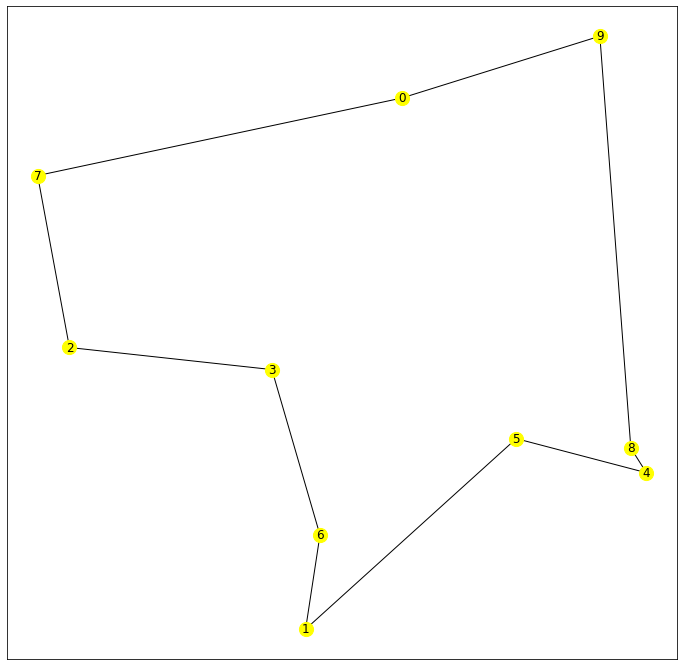

In [ ]:
Gt=graph_of_tour(tour)
print('size of tour:', Gt.size(weight='weight'))
print('feasibility:',nx.is_k_edge_connected(Gt,2))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show() 

In [ ]:
C={}
n=10
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)


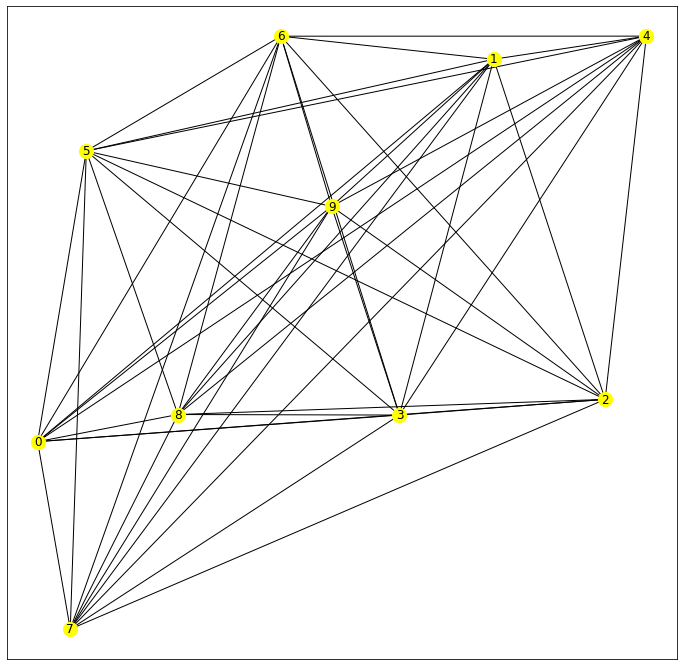

In [8]:
pre_tour = [i for i in C]
pre_tour
G = nx.Graph()
for v in C:
    G.add_node(v)
for i, ci in enumerate(C):
    for j, cj in enumerate(C):
        if i < j:
            G.add_edge(ci,cj, weight=distance(C[ci], C[cj]))
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(G,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show() 

In [22]:
# start = random.randint(0,n)
import time
start = 0
tour = [start]
visited = {start:True}
while len(tour) < len(C):
    v = tour[-1]
    random_min_u = decide_u(v)
    print(random_min_u)
    if random_min_u not in visited:
        visited[random_min_u] = True
        tour.append(random_min_u)
    time.sleep(1)
tour

4
[0, 4]
{0: True, 4: True}

5
[0, 4, 5]
{0: True, 4: True, 5: True}

5
5
7
[0, 4, 5, 7]
{0: True, 4: True, 5: True, 7: True}

7
3
[0, 4, 5, 7, 3]
{0: True, 4: True, 5: True, 7: True, 3: True}

8
[0, 4, 5, 7, 3, 8]
{0: True, 4: True, 5: True, 7: True, 3: True, 8: True}

7
7
7
3
0
0
7
7
0
0
0
7
3
0
3
3
0
0
0
3
0
0
0
0
0
3
7
3


KeyboardInterrupt: ignored

In [21]:
def decide_u(v):
    d = [G[v][u]["weight"] for u in G[v]]
    sort_d = sorted(d)[:4]
    choice = sort_d[random.randint(0,2)]
    u = d.index(choice)
    return u

In [20]:
d = [G[v][u]["weight"] for u in G[v]]
print(sorted(d))
print(len(d))
sort_d = sorted(d)[:3]
print(sort_d)
choice = sort_d[random.randint(0,2)]
random.randint(0,2)

[3167.761512487959, 3904.2709946928635, 5923.0709940030265, 7992.310116605837, 7995.840981410273, 8578.004546513133, 10357.368874381176, 11293.25763453575, 12900.740598895864]
9
[3167.761512487959, 3904.2709946928635, 5923.0709940030265]


2

In [12]:
|l = sorted([G[v][u] for u in G[v]], key=labmda x:x[1])
l

SyntaxError: ignored

In [28]:
d = [G[v][u]["weight"] for u in G[v]]
sort_d = sorted([G[v][u]["weight"] for u in G[v]])[:3]
choice = sort_d[0]
u = d.index(choice)

[3099.778217873014, 6000.798780162521, 5931.459854032563, 6347.630266485281, 7764.652278112652, 142.3411395205195, 3861.9265917414846, 7165.789349401781, 4231.959357082721]
142.3411395205195
5


In [30]:
sort_d

[142.3411395205195, 3099.778217873014, 3861.9265917414846]